In [22]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from utils import equal_length_binary

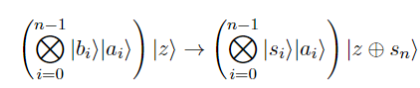
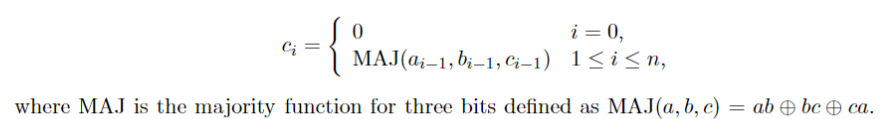
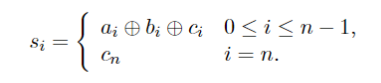

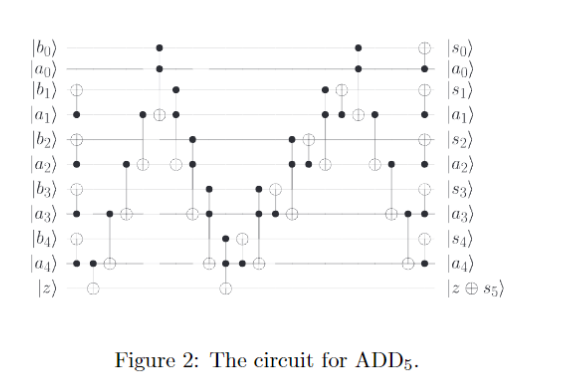

An unbounded fan-out gate on n + 1 qubits copies a classical source bit into n copies

In [49]:
def create_ripple_carry_adder(x, y):
    # no ancillary qubits
    # size = 7*n - 6
    
    # Int to binary
    x_binary, y_binary, n = equal_length_binary(x, y)
    
    # Create quantum registers: 2n for the two numbers and 1 for the carry bit
    a = QuantumRegister(n, 'a')
    b = QuantumRegister(n, 'b')
    c = QuantumRegister(1, 'carry')

    # Create a classical register for the output
    output = ClassicalRegister(n + 1, 'output')

    # Create a quantum circuit
    circuit = QuantumCircuit(a, b, c, output)
    
    # Encode bits in the circuit
    for i in range(n):
        if x_binary[n -i-1] == '1':
            circuit.x(b[i])
        if y_binary[n-i-1] == '1':
            circuit.x(a[i])
    
    
    
    
    for i in range(1, n):
        circuit.cnot(a[i], b[i])
    
    circuit.cnot(a[n - 1], c)
    
    for j in range(n - 2, 0, -1):
        circuit.cnot(a[j], a[j + 1])
    
    for i in range(0, n - 1):
        circuit.ccx(b[i], a[i], a[i + 1])
        
    circuit.ccx(b[n - 1], a[n - 1], c)

    for k in range(n - 2, -1 ,-1):
        circuit.cnot(a[k], b[k])
        circuit.ccx(b[k], a[k], a[k + 1])
        
    for j in range(1, n - 2):
        circuit.cnot(a[j], a[j + 1])
    
    for i in range(0, n):
        circuit.cnot(a[i], b[i])
    

    # Measure the second register (b) to get the output
    simulator = Aer.get_backend('qasm_simulator')
    #circuit.measure(b, output)
    circuit.measure(b, output[0:n])
    circuit.measure(c, output[n]) 
    result = execute(circuit, simulator).result()
    counts = result.get_counts(circuit)
    print(counts)
    #plot_histogram(counts)
    

    return circuit


adder_circuit = create_ripple_carry_adder(16, 16)
#print(adder_circuit.draw())


{'110000': 1024}
